<a href="https://colab.research.google.com/github/jm12312/Data-Science-And-ML/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets --quiet

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import sklearn
import seaborn as sns

In [ ]:
od.download("https://www.kaggle.com/competitions/titanic/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshuamenezes
Your Kaggle Key: ··········


100%|██████████| 34.1k/34.1k [00:00<00:00, 31.3MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic


In [ ]:
raw_df = pd.read_csv("titanic/train.csv")
raw_test_df = pd.read_csv("titanic/test.csv")

In [ ]:
raw_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **EDA**

In [ ]:
px.violin(raw_df, x="Pclass", y="Fare", color="Survived")

In [ ]:
px.scatter(raw_df, x="Age", y="Fare", color="Survived")

<Axes: xlabel='Age', ylabel='Count'>

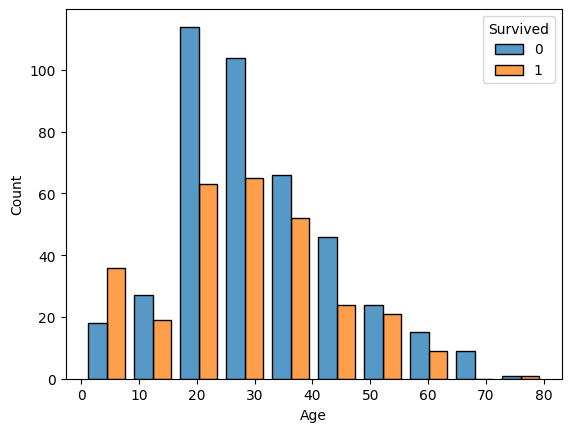

In [ ]:
sns.histplot(raw_df,x="Age", bins=10, hue="Survived", multiple="dodge", shrink=0.8)

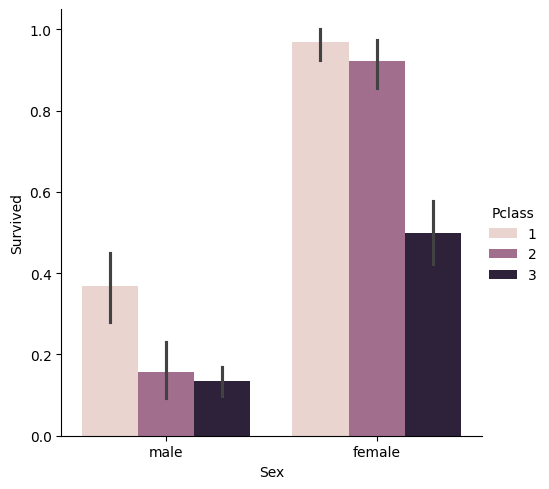

In [ ]:
sns.catplot(data=raw_df, x="Sex", y="Survived", hue="Pclass", kind="bar")

<Axes: xlabel='Sex', ylabel='Survived'>

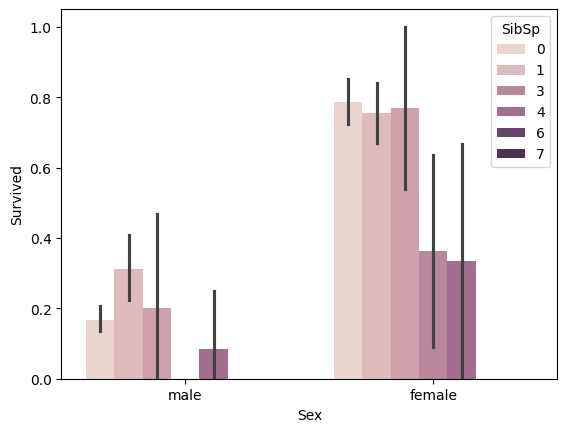

In [ ]:
sns.barplot(data=raw_df, x="Sex", y="Survived", hue="SibSp")

<Axes: xlabel='Sex', ylabel='Survived'>

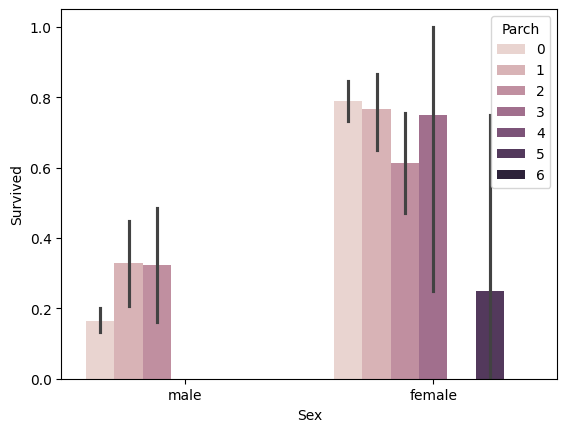

In [ ]:
sns.barplot(data=raw_df, x="Sex", y="Survived", hue="Parch")

<Axes: xlabel='Sex', ylabel='Survived'>

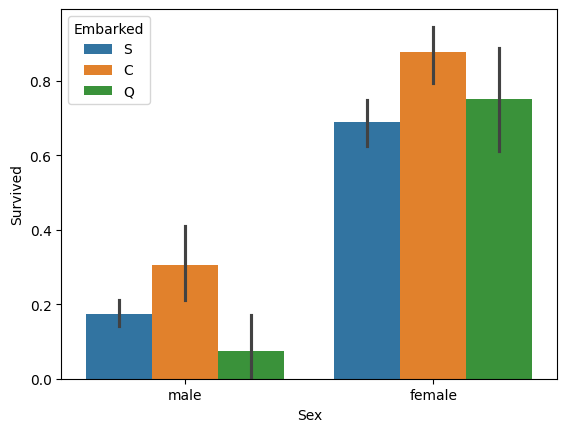

In [ ]:
sns.barplot(data=raw_df, x="Sex", y="Survived", hue="Embarked")

# **Feature Engineering**

In [ ]:
raw_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
raw_df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
raw_df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.00,0,0,110465,52.0000,C110,S
492,493,0,1,"Molson, Mr. Harry Markland",male,55.00,0,0,113787,30.5000,C30,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.00,1,0,PC 17485,56.9292,A20,C
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.00,0,0,345781,9.5000,NaN,S
744,745,1,3,"Stranden, Mr. Juho",male,31.00,0,0,STON/O 2. 3101288,7.9250,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,B96 B98,S
209,210,1,1,"Blank, Mr. Henry",male,40.00,0,0,112277,31.0000,A31,C


In [ ]:
raw_df["Number_of_Family_Members"] = raw_df["SibSp"] + raw_df["Parch"]+1
raw_test_df["Number_of_Family_Members"] = raw_test_df["SibSp"] + raw_test_df["Parch"]+1

In [ ]:
def func(row):
  t = ["Mr.", "Mrs.", "Miss.", "Master."]
  d = {"Mr.": 1, "Mrs.": 2, "Miss.": 3, "Master.": 4}
  for x in t:
    if x in  row["Name"]:
      return d[x]
  return "Others"
raw_df["Title"]  = raw_df.apply(func, axis=1)
raw_test_df["Title"]  = raw_test_df.apply(func, axis=1)

In [ ]:
med = raw_df.groupby("Title")["Age"]
med.median(), med.max(), med.min()

(Title
 1         30.0
 2         35.0
 3         21.0
 4          3.5
 Others    44.5
 Name: Age, dtype: float64,
 Title
 1         80.0
 2         63.0
 3         63.0
 4         12.0
 Others    70.0
 Name: Age, dtype: float64,
 Title
 1         11.00
 2         14.00
 3          0.75
 4          0.42
 Others    23.00
 Name: Age, dtype: float64)

In [ ]:
raw_df["Age"] = raw_df["Age"].fillna(med.transform("median"))
raw_df["Embarked"] = raw_df["Embarked"].fillna("C")
raw_test_df["Age"] = raw_test_df["Age"].fillna(med.transform("median"))
raw_test_df["Embarked"] = raw_test_df["Embarked"].fillna("C")

In [ ]:
def func2(row):
  c = ["A", "B", "C", "D", "E", "F", "G", "T"]
  d = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F":6, "G":7, "T":8}
  for x in c:
    if not pd.isna(row["Cabin"]):
      if x in row["Cabin"]:
        return d[x]
  return 10
raw_df["Cabin_Coach"] = raw_df.apply(func2, axis=1)
raw_test_df["Cabin_Coach"] = raw_test_df.apply(func2, axis=1)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassengerId               891 non-null    int64  
 1   Survived                  891 non-null    int64  
 2   Pclass                    891 non-null    int64  
 3   Name                      891 non-null    object 
 4   Sex                       891 non-null    object 
 5   Age                       891 non-null    float64
 6   SibSp                     891 non-null    int64  
 7   Parch                     891 non-null    int64  
 8   Ticket                    891 non-null    object 
 9   Fare                      891 non-null    float64
 10  Cabin                     204 non-null    object 
 11  Embarked                  891 non-null    object 
 12  Number_of_Family_Members  891 non-null    int64  
 13  Title                     891 non-null    object 
 14  Cabin_Coac

<Axes: xlabel='Cabin_Coach', ylabel='count'>

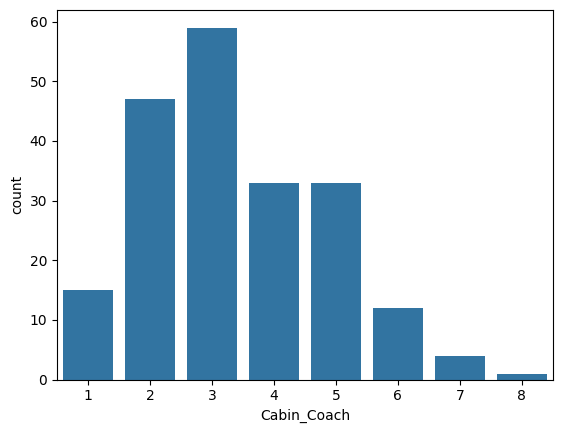

In [ ]:
sns.countplot(raw_df[raw_df["Cabin_Coach"]!=10], x="Cabin_Coach")

In [ ]:
raw_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'Number_of_Family_Members', 'Title', 'Cabin_Coach'],
      dtype='object')

In [ ]:
input_cols = ["Pclass", "Sex", "Age", "Fare", "Number_of_Family_Members", "Title", "Cabin_Coach", "Embarked"]
target_col = "Survived"
numeric_cols = ["Age", "Fare", "Number_of_Family_Members"]
categorical_cols = ["Pclass", "Sex", "Title", "Embarked", "Cabin_Coach"]

In [ ]:
input_df = raw_df[input_cols]
target_df = raw_df[target_col]
test_df = raw_test_df[input_cols]

In [ ]:

test_df.fillna(input_df["Fare"].median(), inplace=True)
test_df.isna().sum()

<ipython-input-17-f8dbc0083c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.fillna(input_df["Fare"].median(), inplace=True)


,0
Pclass,0
Sex,0
Age,0
Fare,0
Number_of_Family_Members,0
Title,0
Cabin_Coach,0
Embarked,0


In [ ]:
input_df.isna().sum()

,0
Pclass,0
Sex,0
Age,0
Fare,0
Number_of_Family_Members,0
Title,0
Cabin_Coach,0
Embarked,0


In [ ]:
input_df

,Pclass,Sex,Age,Fare,Number_of_Family_Members,Title,Cabin_Coach,Embarked
0,3,male,22.0,7.2500,2,1,10,S
1,1,female,38.0,71.2833,2,2,3,C
2,3,female,26.0,7.9250,1,3,10,S
3,1,female,35.0,53.1000,2,2,3,S
4,3,male,35.0,8.0500,1,1,10,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,13.0000,1,Others,10,S
887,1,female,19.0,30.0000,1,3,2,S
888,3,female,21.0,23.4500,4,3,10,S
889,1,male,26.0,30.0000,1,1,3,C


In [ ]:
target_df

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

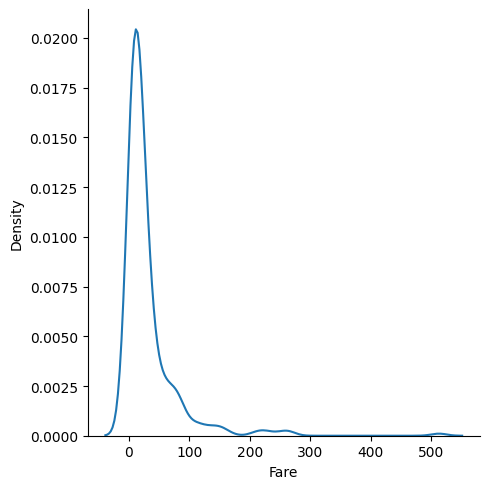

In [ ]:
sns.displot(x=raw_df["Fare"], kind="kde")

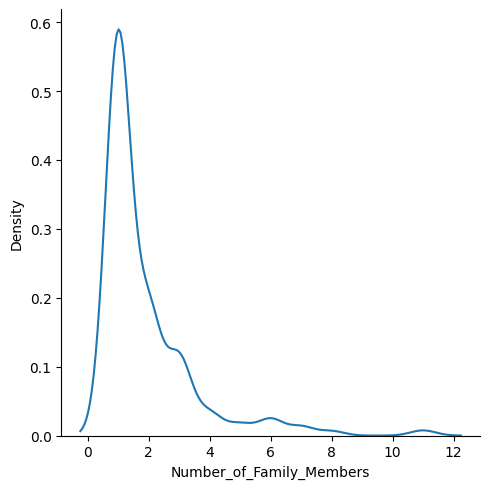

In [ ]:
sns.displot(x=raw_df["Number_of_Family_Members"], kind="kde")

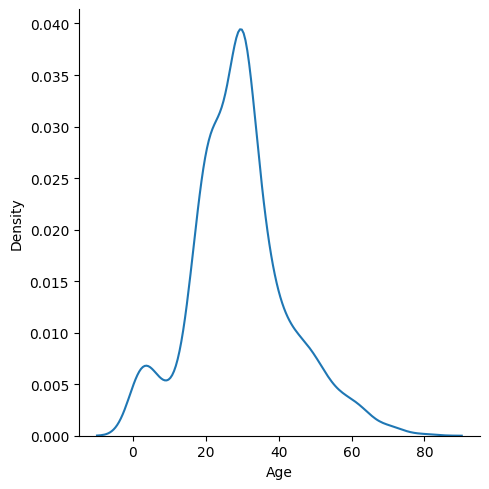

In [ ]:
sns.displot(x=raw_df["Age"], kind="kde")

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

robustScaler = RobustScaler().fit(input_df[["Number_of_Family_Members", "Fare"]])
minmaxScaler = MinMaxScaler()
standardScaler = StandardScaler().fit(input_df[["Age"]])

input_df[["Number_of_Family_Members", "Fare"]] = robustScaler.transform(input_df[["Number_of_Family_Members", "Fare"]])
test_df[["Number_of_Family_Members", "Fare"]] = robustScaler.transform(test_df[["Number_of_Family_Members", "Fare"]])
input_df["Age"] = standardScaler.transform(input_df[["Age"]])
test_df["Age"] = standardScaler.transform(test_df[["Age"]])

<ipython-input-20-71a2eaf46525>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[["Number_of_Family_Members", "Fare"]] = robustScaler.transform(input_df[["Number_of_Family_Members", "Fare"]])
<ipython-input-20-71a2eaf46525>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[["Number_of_Family_Members", "Fare"]] = robustScaler.transform(test_df[["Number_of_Family_Members", "Fare"]])
<ipython-input-20-71a2eaf46525>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [ ]:
input_df.describe()

,Pclass,Age,Fare,Number_of_Family_Members,Cabin_Coach
count,891.000000,8.910000e+02,891.000000,891.000000,891.000000
mean,2.308642,7.177199e-17,0.768745,0.904602,8.485971
std,0.836071,1.000562e+00,2.152200,1.613459,2.867206
min,1.000000,-2.185412e+00,-0.626005,0.000000,1.000000
25%,2.000000,-6.328075e-01,-0.283409,0.000000,10.000000
50%,3.000000,4.617396e-02,0.000000,0.000000,10.000000
75%,3.000000,4.233859e-01,0.716591,1.000000,10.000000
max,3.000000,3.818293e+00,21.562738,10.000000,10.000000


In [ ]:
test_df.describe()

,Pclass,Age,Fare,Number_of_Family_Members,Cabin_Coach
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.031374,0.914799,0.839713,8.535885
std,0.841838,0.978610,2.418842,1.519072,2.849528
min,1.000000,-2.204272,-0.626005,0.000000,1.000000
25%,1.000000,-0.632808,-0.284041,0.000000,10.000000
50%,3.000000,0.046174,0.000000,0.000000,10.000000
75%,3.000000,0.498828,0.737028,1.000000,10.000000
max,3.000000,3.516524,21.562738,10.000000,10.000000


In [ ]:
input_df[categorical_cols] = input_df[categorical_cols].astype(str)
test_df[categorical_cols] = test_df[categorical_cols].astype(str)
onehotEncoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore").fit(input_df[categorical_cols])

<ipython-input-23-e23422bf398d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[categorical_cols] = input_df[categorical_cols].astype(str)
<ipython-input-23-e23422bf398d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[categorical_cols] = test_df[categorical_cols].astype(str)


In [ ]:
encoded_cols = list(onehotEncoder.get_feature_names_out(categorical_cols))
input_df[encoded_cols] = onehotEncoder.transform(input_df[categorical_cols])
test_df[encoded_cols] = onehotEncoder.transform(test_df[categorical_cols])

<ipython-input-24-52d842ed357a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[encoded_cols] = onehotEncoder.transform(input_df[categorical_cols])
<ipython-input-24-52d842ed357a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[encoded_cols] = onehotEncoder.transform(input_df[categorical_cols])
<ipython-input-24-52d842ed357a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
pd.set_option("display.max_columns", 100)

In [ ]:
input_df = input_df[numeric_cols + encoded_cols]
input_df

,Age,Fare,Number_of_Family_Members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_1,Title_2,Title_3,Title_4,Title_Others,Embarked_C,Embarked_Q,Embarked_S,Cabin_Coach_1,Cabin_Coach_10,Cabin_Coach_2,Cabin_Coach_3,Cabin_Coach_4,Cabin_Coach_5,Cabin_Coach_6,Cabin_Coach_7,Cabin_Coach_8
0,-0.557365,-0.312011,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649713,2.461242,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.255596,-0.282777,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.423386,1.673732,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.423386,-0.277363,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.180153,-0.062981,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,-0.783692,0.673281,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,-0.632808,0.389604,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,-0.255596,0.673281,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df = test_df[numeric_cols + encoded_cols]
test_df

,Age,Fare,Number_of_Family_Members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_1,Title_2,Title_3,Title_4,Title_Others,Embarked_C,Embarked_Q,Embarked_S,Cabin_Coach_1,Cabin_Coach_10,Cabin_Coach_2,Cabin_Coach_3,Cabin_Coach_4,Cabin_Coach_5,Cabin_Coach_6,Cabin_Coach_7,Cabin_Coach_8
0,0.385665,-0.286926,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.328695,-0.322838,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.460330,-0.206444,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.180153,-0.250836,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.557365,-0.093839,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.046174,-0.277363,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,0.725155,4.090404,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
415,0.687434,-0.312011,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,0.423386,-0.277363,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Model**

Basic Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def female_survive(df):
  preds = []
  for i in range(len(df)):
    if df["Sex_female"].iloc[i] == 1:
      preds.append(1)
    else:
      preds.append(0)
  return preds
preds = female_survive(input_df)

In [ ]:
accuracy_score(target_df, preds)

0.7867564534231201

In [ ]:
confusion_matrix(target_df, preds)

array([[468,  81],
       [109, 233]])

Logistic Regression Model

In [ ]:
x = input_df
x_train, x_val, train_target, val_target = train_test_split(x, target_df, test_size=0.25, random_state=2)

<Axes: >

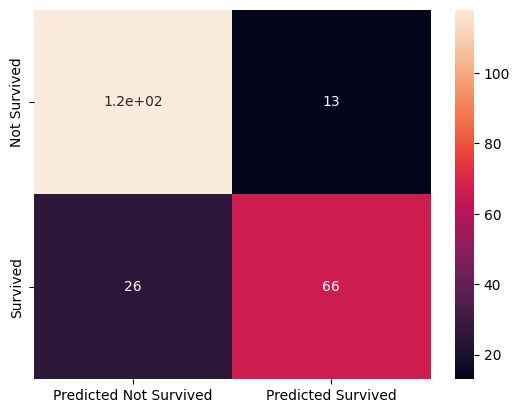

In [ ]:
def train_and_predict(model):
  model.fit(x_train, train_target)
  pred1 = model.predict(x_train)
  pred2 = model.predict(x_val)
  score1 = accuracy_score(train_target, pred1)
  score2 = accuracy_score(val_target, pred2)
  matrix = confusion_matrix(val_target, pred2)
  matrix_train = confusion_matrix(train_target, pred1)
  return score1, score2, matrix, matrix_train


model_1 = LogisticRegression(max_iter=100)
score1, score2, matrix, matrix_train = train_and_predict(model_1)

sns.heatmap(matrix, annot=True, xticklabels=["Predicted Not Survived", "Predicted Survived"], yticklabels=["Not Survived", "Survived"])

In [ ]:
score1, score2

(0.8517964071856288, 0.8251121076233184)

<Axes: >

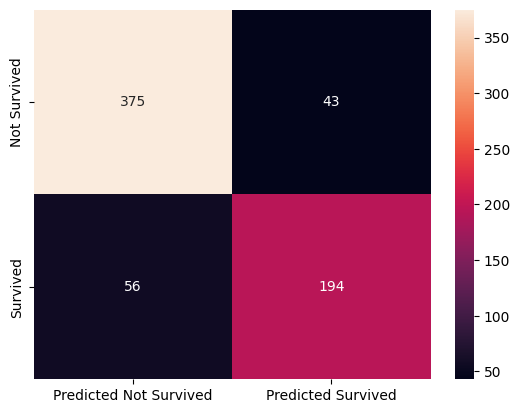

In [ ]:
sns.heatmap(matrix_train, annot=True, xticklabels=["Predicted Not Survived", "Predicted Survived"], yticklabels=["Not Survived", "Survived"], fmt=".3g")

<Axes: xlabel='Importance', ylabel='Columns'>

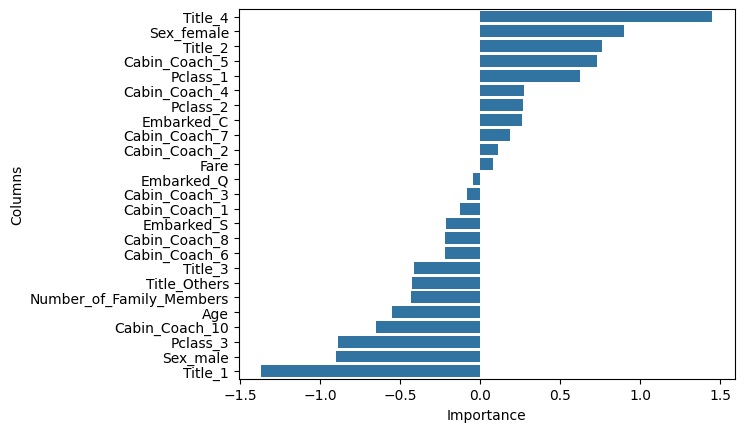

In [ ]:
importance_df = pd.DataFrame({"Columns": list(x_train.columns), "Importance": model_1.coef_[0]}).sort_values("Importance", ascending=False)
sns.barplot(data=importance_df, x="Importance", y="Columns")

SVC

In [ ]:
model = svm.SVC()
score1, score2, matrix, matrix_train = train_and_predict(model)
# sns.heatmap(matrix, annot=True, xticklabels=["Predicted Not Survived", "Predicted Survived"], yticklabels=["Not Survived", "Survived"])
score1, score2

(0.8413173652694611, 0.8161434977578476)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
    'C': [1,3, 4, 5,6,7, 8],
    'gamma': ["scale"],
    'kernel': ['rbf', 'linear', "sigmoid"]
}
# gridsearch = GridSearchCV(svm.SVC(), param_grid, cv=5)
# gridsearch.fit(x_train, train_target)
# gridsearch.best_params_
model_2 = svm.SVC(C=100, gamma="scale", kernel="rbf")
score1, score2, matrix, matrix_train = train_and_predict(model_2)
score1, score2

(0.9026946107784432, 0.8116591928251121)

In [ ]:
(0.8595505617977528, 0.8268156424581006)
(0.8960674157303371, 0.8379888268156425)

(0.8960674157303371, 0.8379888268156425)

Decision Trees

In [ ]:
model_3 = DecisionTreeClassifier(random_state=42, max_depth=9, max_features=20)

#(0.9213483146067416, 0.8324022346368715)
# param_grid = {
#   # "criterion": ["gini"],
#   "max_depth": [None, 3,9],
#   "max_features": [None ,10 , "log2"],
#   # "min_samples_split": [2, 3, 4],
#   # "min_samples_leaf": [1, 2, 4, 6, 8]
# }
# gridsearch = GridSearchCV(model, param_grid)
# gridsearch.fit(x_train, train_target)
# gridsearch.best_params_
score1, score2, matrix, matrix_train = train_and_predict(model_3)
score1, score2
# {'criterion': 'gini',
#  'max_depth': 10,
#  'max_features': 15,
#  'min_samples_leaf': 6,
#  'min_samples_split': 2,
#  'random_state': 42}

(0.9311377245508982, 0.8071748878923767)

Random Forest

In [ ]:
model_4 = RandomForestClassifier(n_estimators=1000, max_depth=9, max_features=20,criterion="gini", random_state=42, n_jobs=-1)
score1, score2, matrix, matrix_train = train_and_predict(model_4)
score1, score2

(0.9565868263473054, 0.8340807174887892)

In [ ]:
(0.9396067415730337, 0.8435754189944135)

(0.9396067415730337, 0.8435754189944135)

In [ ]:
from xgboost import XGBClassifier
model_5 = XGBClassifier(n_jobs=-1, random_state=42, n_estimators=1000, max_depth=20, learning_rate=0.01)
score1, score2, matrix, matrix_train = train_and_predict(model_5)
score1, score2

(0.9745508982035929, 0.8071748878923767)

In [ ]:
(0.9817415730337079, 0.8324022346368715)
(0.9719101123595506, 0.8435754189944135)

(0.9719101123595506, 0.8435754189944135)

In [ ]:
model_1.fit(x, target_df)
model_2.fit(x, target_df)
model_3.fit(x, target_df)
model_4.fit(x, target_df)
model_5.fit(x, target_df)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
accuracy_score(target_df, model_1.predict(x)), accuracy_score(target_df, model_2.predict(x)), accuracy_score(target_df, model_3.predict(x)), accuracy_score(target_df, model_4.predict(x)), accuracy_score(target_df, model_5.predict(x))

(0.8372615039281706,
 0.8933782267115601,
 0.9135802469135802,
 0.9438832772166106,
 0.9719416386083053)

In [ ]:
pred1 = model_1.predict(test_df)
pred2 = model_2.predict(test_df)
pred3 = model_3.predict(test_df)
pred4 = model_4.predict(test_df)
pred5 = model_5.predict(test_df)

<Axes: >

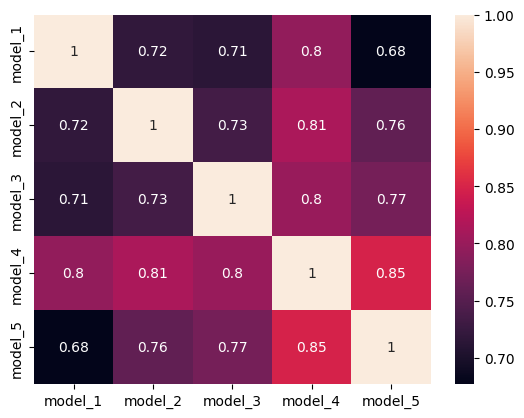

In [ ]:
# pd.concat([pd.DataFrame(pred1, pred2, pre), ], axis=1)
df1 = pd.DataFrame([pred1, pred2, pred3, pred4, pred5]).T
df1.columns = ["model_1", "model_2", "model_3", "model_4", "model_5"]
sns.heatmap(df1.corr(), annot=True)

In [ ]:
final_pred = pred4
final_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
final_pred = [1 if i>0.5 else 0 for i in final_pred]

In [ ]:
submission = pd.read_csv("titanic/gender_submission.csv")

In [ ]:
submission["Survived"] = final_pred
submission.to_csv("submission.csv", index=False)

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
len(x_train.columns)

25

**Deep Learning Model**

In [ ]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential([
    Dense(64, activation="relu", input_shape=[len(x_train.columns)]),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early = EarlyStopping(patience=20, min_delta=0.001, monitor="val_accuracy",restore_best_weights=True)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(x_train, train_target, validation_data=(x_val, val_target), epochs=800, verbose=0, callbacks=[early])
history

In [ ]:
history.history["accuracy"][10:]

[0.8682634830474854,
 0.8652694821357727,
 0.8697604537010193,
 0.8682634830474854,
 0.8667664527893066,
 0.8667664527893066,
 0.8622754216194153,
 0.8682634830474854,
 0.8802395462989807,
 0.8697604537010193,
 0.8727545142173767,
 0.8697604537010193,
 0.871257483959198,
 0.8772454857826233]

<Axes: >

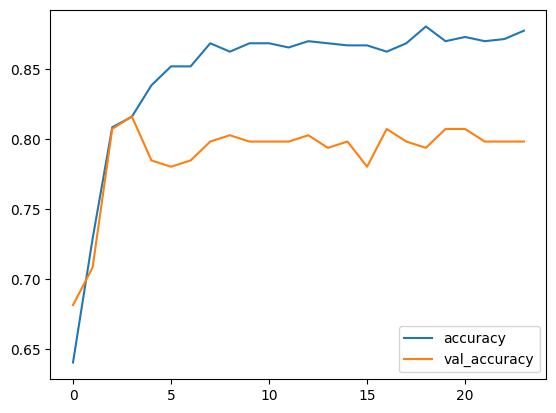

In [ ]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()